# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions.

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset).

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance2.csv to insurance2.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean of medical charges is $13,270.42, and the standard deviation is $12,110.01. The histogram shows a right-skewed distribution with a long tail of high charges. This skewness makes the mean and standard deviation less appropriate, as they are heavily influenced by outliers. In such cases, the median and interquartile range (IQR) may provide more robust measures of central tendency and spread.

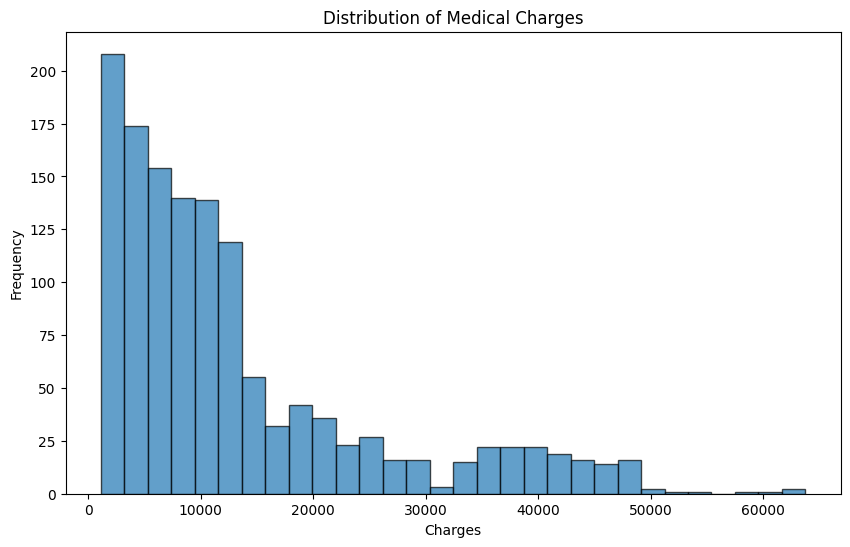

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Calculate mean and standard deviation
mean_charges = medical['charges'].mean()
std_charges = medical['charges'].std()

print("Mean of charges:", round(mean_charges, 2))
print("Standard deviation of charges:", round(std_charges, 2))

Mean of charges: 13270.42
Standard deviation of charges: 12110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since we are assuming that the charges data represent a random sample from the hospital’s population, the Central Limit Theorem (CLT) applies — which allows us to use normal or t-based inference on the sample mean, even if the underlying distribution is skewed (as long as the sample size is large enough, which it is here: n = 1338).

To test whether the average charge has fallen below $12,000, we can use a one-sample, one-sided t-test with the following setup:

Null hypothesis (H₀): μ ≥ 12,000

Alternative hypothesis (H₁): μ < 12,000

The one-sample t-test is appropriate here because:

We are testing a sample mean against a known value

The population standard deviation is unknown (we estimate it from the sample)



__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the administrator is only concerned if the average charge has dropped below $12,000, a one-sided 95% confidence interval is appropriate. Using a t-critical value of 1.646, we calculated a margin of error of $544.94. This gives us a lower bound of the confidence interval at $12,725.49.

In [7]:
# Sample size and degrees of freedom
n = len(medical)
df = n - 1


In [8]:
# Sample mean and standard deviation
sample_mean = medical['charges'].mean()
sample_std = medical['charges'].std(ddof=1)

# One-sided 95% confidence → use 0.05 in t.ppf (not 0.025)
t_critical = t.ppf(0.95, df)

In [9]:
# Margin of error (one-sided)
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Lower bound of one-sided 95% confidence interval
ci_lower = sample_mean - margin_of_error

# Output
print("Sample Mean:", round(sample_mean, 2))
print("T-critical (one-sided, 95%):", round(t_critical, 3))
print("Margin of Error:", round(margin_of_error, 2))
print("One-sided 95% CI lower bound:", round(ci_lower, 2))

Sample Mean: 13270.42
T-critical (one-sided, 95%): 1.646
Margin of Error: 544.94
One-sided 95% CI lower bound: 12725.49


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*).

What assumption about the variances of the two groups are we making here?

__A:__ Null Hypothesis (H₀):
𝜇
insured
=
𝜇
uninsured

→ There is no difference in the mean charges between insured and uninsured individuals.

Alternative Hypothesis (H₁):
𝜇
insured
≠
𝜇
uninsured

→ There is a difference in the mean charges between the two groups.

We are assuming that the variances of the two groups are equal (homogeneity of variances).
This assumption is necessary for using the pooled standard deviation in the two-sample t-test.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ There is strong statistical evidence that people with insurance are charged significantly different amounts compared to those without insurance.

In [11]:
# Split data
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

In [12]:
# Sample sizes
n1 = len(insured)
n0 = len(uninsured)

# Means and standard deviations
mean1 = insured.mean()
mean0 = uninsured.mean()
std1 = insured.std()
std0 = uninsured.std()

In [13]:
# Pooled standard deviation
sp = np.sqrt(((n1 - 1) * std1**2 + (n0 - 1) * std0**2) / (n1 + n0 - 2))

# t-statistic
t_stat = (mean1 - mean0) / (sp * np.sqrt(1/n1 + 1/n0))

In [14]:
# Degrees of freedom
df = n1 + n0 - 2

# Two-tailed p-value
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=df))

print("t-statistic:", round(t_stat, 3))
print("Degrees of freedom:", df)
print("p-value:", round(p_value, 4))

t-statistic: 11.893
Degrees of freedom: 1336
p-value: 0.0


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ scipy.stats does not include a direct z-test function because t-tests are more applicable in practice, especially when population variance is unknown.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test